Dataset-34

Data-pokemon

Types-Multivariate

Default Task- Clustering

Target Variable 1-None

Target Variable 2-None

Instances-800

Attributes-13

Missing Values-Yes

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.3 MB

In [8]:
from pycaret.datasets import get_data
data = get_data('pokemon')


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,Session id,2063
1,Original data shape,"(800, 13)"
2,Transformed data shape,"(800, 846)"
3,Numeric features,9
4,Categorical features,3
5,Rows with missing values,48.2%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0036,1.8803,11.4605,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=2063)


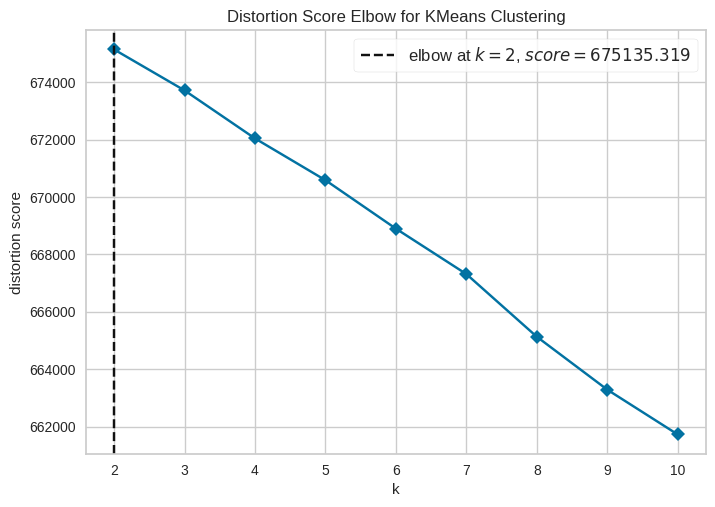

In [27]:
kmeans = create_model('kmeans',)
print(kmeans)
plot_model(kmeans, plot = 'elbow')

Now we see that optimal amount of clusters is 2

In [44]:
kmeans = create_model('kmeans',num_clusters = 2)
print(kmeans)
plot_model(kmeans, plot = 'tsne')
plot_model(kmeans, plot = 'elbow')
plot_model(kmeans, plot = 'distribution')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0050,1.9676,5.6685,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=2, random_state=2063)


In [47]:
# functional API
result = assign_model(kmeans)
result_review=result[result['Cluster']=='Cluster 0']
print(result_review)

       #        Name Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
40    35    Clefairy  Fairy     NaN    323   70      45       48       60   
41    36    Clefable  Fairy     NaN    483   95      70       73       95   
187  173      Cleffa  Fairy     NaN    218   50      25       28       45   
189  175      Togepi  Fairy     NaN    245   35      20       65       40   
190  176     Togetic  Fairy  Flying    405   55      40       85       80   
225  209    Snubbull  Fairy     NaN    300   60      80       50       40   
226  210    Granbull  Fairy     NaN    450   90     120       75       60   
519  468    Togekiss  Fairy  Flying    545   85      50       95      120   
737  669     Flabébé  Fairy     NaN    303   44      38       39       61   
738  670     Floette  Fairy     NaN    371   54      45       47       75   
739  671     Florges  Fairy     NaN    552   78      65       68      112   
752  682    Spritzee  Fairy     NaN    341   78      52       60       63   

We see that such clustering just separates pokemons with Type 1 = Fairy

So as amount of clusters i would like to chose general amount of different variants of "Type 1"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0045,1.8603,7.8075,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=18, random_state=2063)


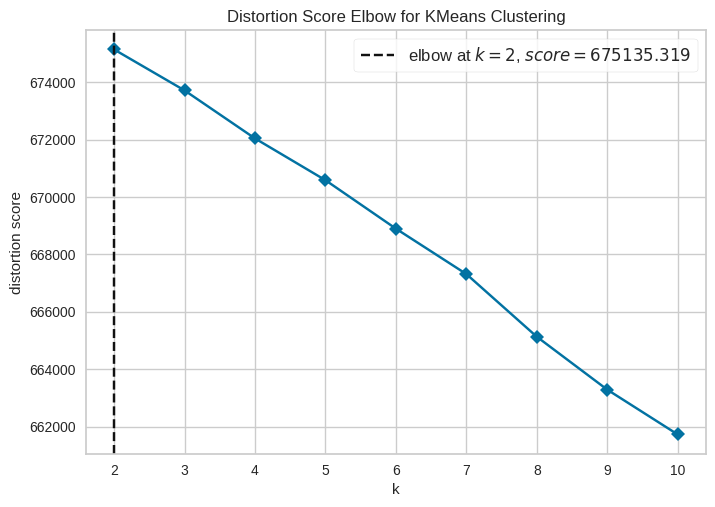

In [49]:
num_unique = data['Type 1'].nunique()
kmeans = create_model('kmeans',num_clusters = num_unique)
print(kmeans)
plot_model(kmeans, plot = 'tsne')
plot_model(kmeans, plot = 'elbow')
plot_model(kmeans, plot = 'distribution')

In [52]:
#  Прогноз
# functional API
predictions = predict_model(kmeans, data = data)
predictions.head()

,#,Name_Bulbasaur,Name_Ivysaur,Name_Venusaur,Name_VenusaurMega Venusaur,Name_Charmander,Name_Charmeleon,Name_Charizard,Name_CharizardMega Charizard X,Name_CharizardMega Charizard Y,...,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,-1.737705,28.266588,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,...,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,-0.297381,Cluster 4
1,-1.732902,-0.035377,28.266588,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,...,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,-0.297381,Cluster 4
2,-1.728100,-0.035377,-0.035377,28.266588,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,...,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,-0.297381,Cluster 4
3,-1.728100,-0.035377,-0.035377,-0.035377,28.266588,-0.035377,-0.035377,-0.035377,-0.035377,-0.035377,...,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,-0.297381,Cluster 4
4,-1.723297,-0.035377,-0.035377,-0.035377,-0.035377,28.266588,-0.035377,-0.035377,-0.035377,-0.035377,...,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,-0.297381,Cluster 3


In [53]:
# Сохранить модель
# functional API
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['#', 'Total', 'HP', 'Attack',
                                              'Defense', 'Sp. Atk', 'Sp. Def',
                                              'Speed', 'Generation'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Name', 'Type 1', 'Type 2'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Name', 'Type 1', 'Type 2'],
                                     transformer=OneHotEncoder(cols=['Name',
                                                                     'Type 1',
                                                                     'Type 2'],
                                                               handle_mi

In [54]:
# Загрузить модель
# functional API
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['#', 'Total', 'HP', 'Attack',
                                             'Defense', 'Sp. Atk', 'Sp. Def',
                                             'Speed', 'Generation'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Type 1', 'Type 2'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Name', 'Type 1', 'Type 2'],
                                    transformer=OneHotEncoder(cols=['Name',
                                                                    'Type 1',
                                                                    'Type 2'],
                     